In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
data = np.loadtxt('F02-1_logs.las', skiprows=37)
data = data[6000:8000,:]
data

array([[ 9.48300000e+02,  2.23840140e+03,  4.27168100e+02, ...,
         5.24010950e+06,  1.51571000e+05,  2.57300000e-01],
       [ 9.48450000e+02,  2.25321750e+03,  4.26165700e+02, ...,
         5.28722700e+06,  1.51571000e+05,  2.48000000e-01],
       [ 9.48600000e+02,  2.24863890e+03,  4.25420100e+02, ...,
         5.28569600e+06,  1.51571000e+05,  2.50900000e-01],
       ...,
       [ 1.24785010e+03,  2.07999440e+03,  4.92929200e+02, ...,
         4.21968100e+06, -2.90588477e+04,  3.56300000e-01],
       [ 1.24800000e+03,  2.05450930e+03,  4.96501600e+02, ...,
         4.13798525e+06, -2.90588477e+04,  3.72200000e-01],
       [ 1.24815000e+03,  2.06280000e+03,  5.05673200e+02, ...,
         4.07931450e+06, -2.90588477e+04,  3.67000000e-01]])

In [118]:
depth = data[:, 0]
rhob = data[:, 1]
dt = data[:, 2]
vp = 1/dt*(10**6)

In [119]:
# data normalization
s_rhob = np.std(rhob, ddof=1)
mean = np.mean(rhob)
print(s_rhob)
print(mean)

rhob_n = (rhob - mean)/s_rhob
s_rhob_n = np.std(rhob_n, ddof=1)
mean_n = np.mean(rhob_n)
print(s_rhob_n)
print(mean_n)

60.6650990187878
2205.3731013
0.9999999999999999
-2.4442670110147444e-15


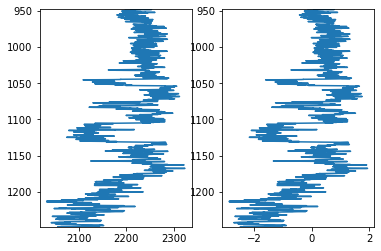

In [120]:
plt.subplot(1,2,1)
plt.plot(rhob, depth)
plt.ylim([np.max(depth), np.min(depth)])
plt.subplot(1,2,2)
plt.plot(rhob_n, depth)
plt.ylim([np.max(depth), np.min(depth)])
plt.show()

In [121]:
## normal score transform
rhobsort = np.sort(rhob)
freq = np.linspace(0,1,len(rhob))
f = interpolate.interp1d(rhobsort, freq)
rhob_norm = f(rhob)
z = np.linspace(-3,3,101)

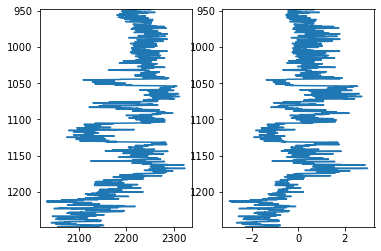

In [122]:
pdf = 1/(2*np.pi)*np.exp(-0.5*z**2)
cdf = np.cumsum(pdf)
cdf = (cdf - np.min(cdf))/(np.max(cdf) - np.min(cdf))
f2 = interpolate.interp1d(cdf, z)
rhob_nst = f2(rhob_norm)
plt.subplot(1,2,1)
plt.plot(rhob, depth)
plt.ylim([np.max(depth), np.min(depth)])
plt.subplot(1,2,2)
plt.plot(rhob_nst, depth)
plt.ylim([np.max(depth), np.min(depth)])
plt.show()

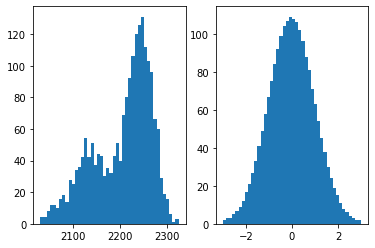

In [123]:
bin = int(np.sqrt(len(rhob)))
plt.subplot(1,2,1)
plt.hist(rhob, bin)
plt.subplot(1,2,2)
plt.hist(rhob_nst, bin)
plt.show()

In [124]:
## bivariate
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
data1 = np.loadtxt('Poseidon2Decim_modif.txt', skiprows=280)

data1 = data1[7815:9600]


In [125]:
data = data1[data1[:, 1] != -999.2500, :]
depth = data[:, 0]
GR = data[:,1]
RS = data[:,2]
RD = data[:,3]
rhob = data[:,7]
dt = data[:,4]
vp = 1/dt*(10**6)

r = np.zeros((4,))

r[0] = stats.pearsonr(dt, rhob)[0]
r[1] = stats.pearsonr(dt, GR)[0]
r[2] = stats.pearsonr(dt, RS)[0]
r[3] = stats.pearsonr(dt, RD)[0]

In [126]:
prew = 0.001
K = np.vstack((rhob, GR,RS,RD,np.ones_like(dt))).T
m = np.linalg.inv(K.T@K + np.eye(K.shape[1])*prew)@K.T@dt
# m = np.linalg.pinv(K)@dt
dt_pred = K@m
vp_pred = 1/dt_pred*(10**6) # Predicted Vp
bad = np.sign(np.diff(vp)) # find the bad-interpolated value of Vp
n = np.where(bad == 0)[0] # find the bad-interpolated value of Vp
vp_new = vp*1
vp_new[n] = vp_pred[n] # corrected Vp

from scipy.signal import medfilt
vp_new = medfilt(vp_new,3)

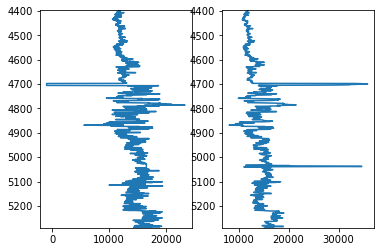

In [127]:
plt.subplot(1,2,1)
plt.plot(vp, depth)
plt.ylim(np.max(depth), np.min(depth))
plt.subplot(1,2,2)
plt.plot(vp_new, depth)
plt.ylim(np.max(depth), np.min(depth))
plt.show()

# Data Outlier

In [ ]:
## bivariate
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
data1 = np.loadtxt('Poseidon2Decim_modif.txt', skiprows=280)

data1 = data1[7815:9600]


In [ ]:
data = data1[data1[:, 1] != -999.2500, :]
depth = data[:, 0]
GR = data[:,1]
RS = data[:,2]
RD = data[:,3]
rhob = data[:,7]
dt = data[:,4]
vp = 1/dt*(10**6)

r = np.zeros((4,))

r[0] = stats.pearsonr(dt, rhob)[0]
r[1] = stats.pearsonr(dt, GR)[0]
r[2] = stats.pearsonr(dt, RS)[0]
r[3] = stats.pearsonr(dt, RD)[0]

In [ ]:
prew = 0.001
K = np.vstack((rhob, GR,RS,RD,np.ones_like(dt))).T
m = np.linalg.inv(K.T@K + np.eye(K.shape[1])*prew)@K.T@dt
# m = np.linalg.pinv(K)@dt
dt_pred = K@m
vp_pred = 1/dt_pred*(10**6) # Predicted Vp
bad = np.sign(np.diff(vp)) # find the bad-interpolated value of Vp
n = np.where(bad == 0)[0] # find the bad-interpolated value of Vp
vp_new = vp*1
vp_new[n] = vp_pred[n] # corrected Vp

from scipy.signal import medfilt
vp_new = medfilt(vp_new,3)

In [ ]:
plt.subplot(1,2,1)
plt.plot(vp, depth)
plt.ylim(np.max(depth), np.min(depth))
plt.subplot(1,2,2)
plt.plot(vp_new, depth)
plt.ylim(np.max(depth), np.min(depth))
plt.show()

# Random Forest

## Log 1 b

In [128]:
## SKLEARN ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
##Load Data

In [2]:
data = np.loadtxt('Log 1b.las', skiprows=36)
column = ['DEPTH','RHOB','DT','GR','AI','AI_rel','DTS','PHIE']
data = pd.DataFrame(data, columns=column)

Depth = data[['DEPTH']].values
## CORRELATION ##
corr = pd.DataFrame(data.corr())
corrVs = corr[['DTS']]
corrVs['Abs'] = np.abs(corrVs[['DTS']])

corrVs.sort_values(by=['Abs'], inplace=True, ascending=False)
print(corrVs)
corrVs = corrVs.drop(['DTS','AI','AI_rel', 'DEPTH', 'PHIE'],axis=0)
name = list(corrVs.index)
print()
print(name)

             DTS       Abs
DTS     1.000000  1.000000
DT      0.980440  0.980440
PHIE    0.978276  0.978276
AI     -0.502016  0.502016
GR      0.393488  0.393488
AI_rel -0.322535  0.322535
DEPTH  -0.301610  0.301610
RHOB    0.170065  0.170065

['DT', 'GR', 'RHOB']


C:\Users\Fikry\AppData\Local\Temp/ipykernel_9988/1274210571.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrVs['Abs'] = np.abs(corrVs[['DTS']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [3]:

## Pemilihan Model##
model = RandomForestRegressor(random_state=0)
x = data[name]
y = data[['DTS']].values
## TRAINING
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [4]:
##Normalization
scaler = StandardScaler()
x2_train= scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

In [5]:
#Training
model.fit(x2_train,y2_train)
predcr1 = model.predict(x2_train)
errcr1 = metrics.mean_absolute_error(y2_train,predcr1)
MSEcr1 = metrics.mean_squared_error(y2_train,predcr1)
p2 = model.get_params(deep=True)
print('Parameter Default: ',p2, sep='\n')
print()
print('#Train Evaluation#')
print('Mean Absolute Error: ',errcr1)
print('Root Mean Square Error: ', MSEcr1)

C:\Users\Fikry\AppData\Local\Temp/ipykernel_9988/1706914851.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x2_train,y2_train)


Parameter Default: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

#Train Evaluation#
Mean Absolute Error:  0.30081968480422516
Root Mean Square Error:  216.44131450141688



#Test Evaluation#
Mean Absolute Error:  0.09020783449341895
Root Mean Square Error:  1.3105369556318445


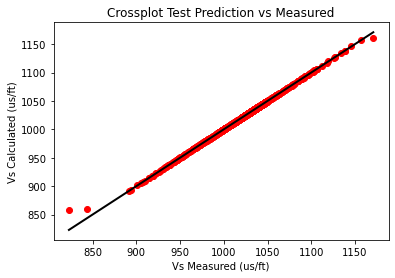

In [6]:
#TEST
predcr2 = model.predict(x2_test)
errcr2 = metrics.mean_absolute_error(y2_test,predcr2)
MSEcr2 = metrics.mean_squared_error(y2_test,predcr2)
print()
print('#Test Evaluation#')
print('Mean Absolute Error: ',errcr2)
print('Root Mean Square Error: ', MSEcr2)
plt.figure()
plt.scatter(y2_test,predcr2,color='red',label='data')

plt.plot([y2_test.min(),y2_test.max()],[y2_test.min(),y2_test.max()],'k-',lw=2)
plt.title('Crossplot Test Prediction vs Measured')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.show()

Mean Absolute Error:  3.253093087067592
Root Mean Square Error:  13.125117981306799
r2:  0.9178806044407577
Correlaton:
[[1.         0.95862691]
 [0.95862691 1.        ]]


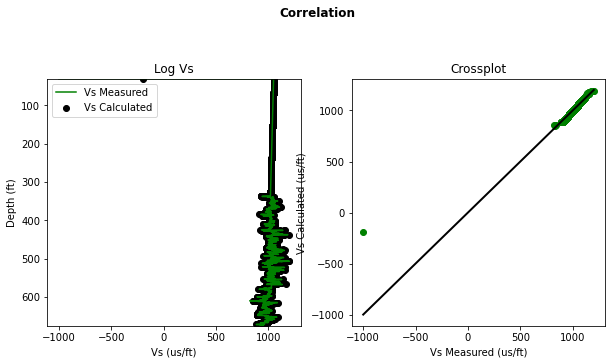

In [7]:
##Tanpa Tuning
##Normalization
scaler = StandardScaler()
xcr= scaler.fit_transform(x)
# xcr = scaler.transform(xcr)
Vs_predcr = model.predict(xcr)
errorcr = metrics.mean_absolute_error(y,Vs_predcr)
MSE_errorcr = np.sqrt(metrics.mean_squared_error(y,Vs_predcr))
R2_scorecr = metrics.r2_score(y,Vs_predcr)
corrcr = np.corrcoef(y[:,0],Vs_predcr)
print('Mean Absolute Error: ',errorcr)
print('Root Mean Square Error: ', MSE_errorcr)
print('r2: ', R2_scorecr)
print('Correlaton:',corrcr,sep='\n')
fig = plt.figure(figsize = (10,10))
fig.add_subplot(221)
plt.plot(y,Depth,color='g',lw=1.5,label='Vs Measured')
plt.scatter(Vs_predcr,Depth,color='black',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')

plt.xlabel('Vs (us/ft)')
plt.legend()
fig.add_subplot(222)
plt.scatter(y,Vs_predcr,color='g',label='data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=2)
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.suptitle('Correlation',fontweight='bold')
plt.show()

In [8]:
##Hyperparameter Optimization
parameters = {'n_estimators': np.arange(0,31)}
cv = 10
Reg = GridSearchCV(model,param_grid=parameters,cv=cv,n_jobs=-1, scoring='neg_root_mean_squared_error',return_train_score=True)
## Best Parameter
Reg.fit(x2_train,y2_train)

best_param3 = Reg.best_params_
params3 = pd.DataFrame.from_dict(best_param3,orient='index')
params3 = params3.iloc[:,0].values
Split3 = pd.DataFrame(Reg.cv_results_)
best_index3 = Reg.best_index_
print('Best Parameters:', best_param3)
#Importance Features only for Random Forest
Importance = pd.DataFrame(model.feature_importances_, index = x.columns,
columns=['Importance']).sort_values('Importance',ascending=False)
print(Importance)
## Evaluation ##
Eval = pd.DataFrame(Split3[['params']])
Eval['mean_train_score'] = Split3[['mean_train_score']]
Eval['mean_test_score'] = Split3[['mean_test_score']]

Best Parameters: {'n_estimators': 1}
      Importance
DT      0.685992
RHOB    0.176712
GR      0.137296


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [         nan -12.26196735 -12.30934643 -12.39288865 -12.39381039
 -12.34971685 -12.31028562 -12.37390252 -12.37990935 -12.46515286
 -12.49658555 -12.45276483 -12.48447346 -12.47224851 -12.45090757
 -12.44507495 -12.41699469 -12.4033579  -12.4299416  -12.40914936
 -12.41782973 -12.42964134 -12.43129832 -12.43550456 -12.40343016
 -12.40995631 -12.39357937 -12.37964479 -12.38554256 -12.39595037
 -12.39436918]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [         nan  -0.25449905  -7.89374828 -11.37410055  -8.56456782
  -6.86011464  -8.24563467  -7.08795795  -6.68843667  -5.94975045
  -5.36948641  -6.5784116   -7.60512005  -7.02981646  -6.53461285
  -7.11302343  -6.6762282   -7.18836388  -7.00750614  -6.64849783
  -6.3276555   -6.743

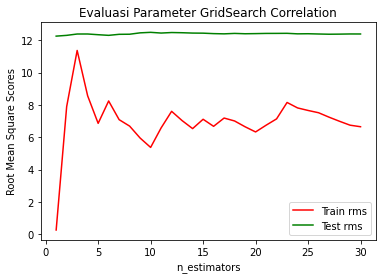

In [9]:

#Random Forest
prm = 'n_estimators'
par = np.arange(0,31)

Train_Scores3 = abs(Eval[['mean_train_score']].values)
Test_Scores3 = abs(Eval[['mean_test_score']].values)
plt.plot(par, Train_Scores3,'r-',label='Train rms')
plt.plot(par,Test_Scores3, 'g-',label='Test rms')
plt.title('Evaluasi Parameter GridSearch Correlation')
# plt.ylim(6,7)
plt.xlabel(prm)
plt.ylabel('Root Mean Square Scores')
plt.legend()
plt.show()

C:\Users\Fikry\AppData\Local\Temp/ipykernel_9988/2540947464.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Alg.fit(x2_train,y2_train)


#Train Evaluation#
Mean Absolute Error:  0.18455024552090865
Root Mean Square Error:  7.090015056558588

#Test Evaluation#
Mean Absolute Error:  0.11273002320186051
Root Mean Square Error:  1.3953566203776957


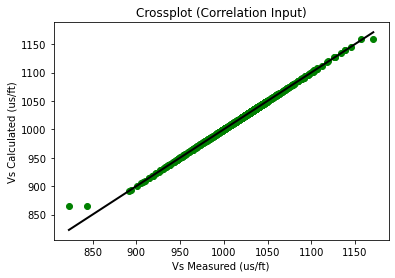

In [10]:
# Validation #
Alg = RandomForestRegressor(n_estimators=5, n_jobs=-1,random_state=0) #Grid
Alg.fit(x2_train,y2_train)
Vs_train = Alg.predict(x2_train)
Vs_test3 = Alg.predict(x2_test)
tmae3 = metrics.mean_absolute_error(y2_train,Vs_train)
trmse3 = np.sqrt(metrics.mean_squared_error(y2_train,Vs_train))
mae3 = metrics.mean_absolute_error(y2_test,Vs_test3)
rmse3 = np.sqrt(metrics.mean_squared_error(y2_test,Vs_test3))

# print()
# print('Validation Correlation')
print('#Train Evaluation#')
print('Mean Absolute Error: ', tmae3)
print('Root Mean Square Error: ', trmse3)
print()
print('#Test Evaluation#')
print('Mean Absolute Error: ',mae3)
print('Root Mean Square Error: ', rmse3)
plt.figure()
plt.scatter(y2_test,Vs_test3,color='g',label='data')
plt.plot([y2_test.min(),y2_test.max()],[y2_test.min(),y2_test.max()],'k-',lw=2)
plt.title('Crossplot (Correlation Input)')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.show()

Mean Absolute Error:  3.1894007986997983
Mean Square Error:  7.5603873083331825
r2:  0.9727524535923772
Correlaton:
[[1.         0.98633999]
 [0.98633999 1.        ]]


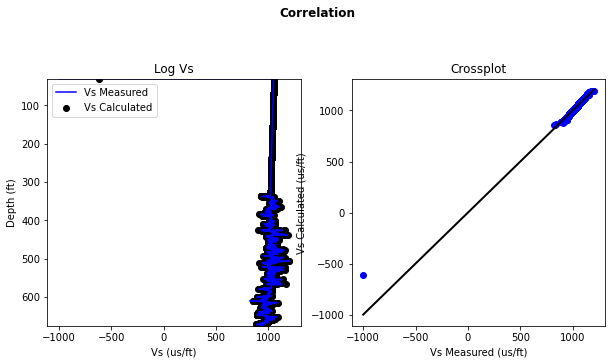

In [11]:

## PREDICTION ##
##Normalization
scaler = StandardScaler()
xcr= scaler.fit_transform(xcr)
Vs_cal3 = Alg.predict(xcr)
mae_cr = metrics.mean_absolute_error(y,Vs_cal3)
rmse_cr = np.sqrt(metrics.mean_squared_error(y,Vs_cal3))
R2_cr = metrics.r2_score(y,Vs_cal3)
corr_cr = np.corrcoef(y[:,0],Vs_cal3)

print('Mean Absolute Error: ',mae_cr)
print('Mean Square Error: ', rmse_cr)
print('r2: ', R2_cr)

print('Correlaton:',corr_cr,sep='\n')
fig = plt.figure(figsize = (10,10))
fig.add_subplot(221)
plt.plot(y,Depth,color='b',lw=1.5,label='Vs Measured')
plt.scatter(Vs_cal3,Depth,color='black',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')
plt.xlabel('Vs (us/ft)')
plt.legend()
fig.add_subplot(222)
plt.scatter(y,Vs_cal3,color='b',label='data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=2)
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.suptitle('Correlation',fontweight='bold')
plt.show()